# Градиентный спуск (Gradient Descent)

## Введение

Градиентный спуск — это итеративный алгоритм оптимизации для нахождения минимума функции. Это фундаментальный метод в машинном обучении, используемый для обучения моделей.

### Применение в биологии:
- Обучение моделей для предсказания структуры белков
- Оптимизация параметров в моделях регуляции генов
- Анализ данных секвенирования
- Классификация типов клеток

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

## 1. Основы градиентного спуска

Базовый алгоритм:

$$\theta_{t+1} = \theta_t - \alpha \nabla f(\theta_t)$$

где:
- $\theta$ — параметры модели
- $\alpha$ — learning rate (скорость обучения)
- $\nabla f(\theta)$ — градиент функции потерь

## 2. Простой пример: Минимизация квадратичной функции

In [2]:
def quadratic_function(x):
    """Простая квадратичная функция: f(x) = x^2"""
    return x**2

def quadratic_gradient(x):
    """Градиент: f'(x) = 2x"""
    return 2*x

def gradient_descent_1d(start_x, learning_rate, n_iterations):
    """Градиентный спуск для одномерной функции"""
    x = start_x
    history = [x]
    
    for i in range(n_iterations):
        gradient = quadratic_gradient(x)
        x = x - learning_rate * gradient
        history.append(x)
    
    return np.array(history)

# Тестируем с разными learning rates
start_point = 5
iterations = 20

lr_small = 0.1
lr_good = 0.3
lr_large = 0.6

history_small = gradient_descent_1d(start_point, lr_small, iterations)
history_good = gradient_descent_1d(start_point, lr_good, iterations)
history_large = gradient_descent_1d(start_point, lr_large, iterations)

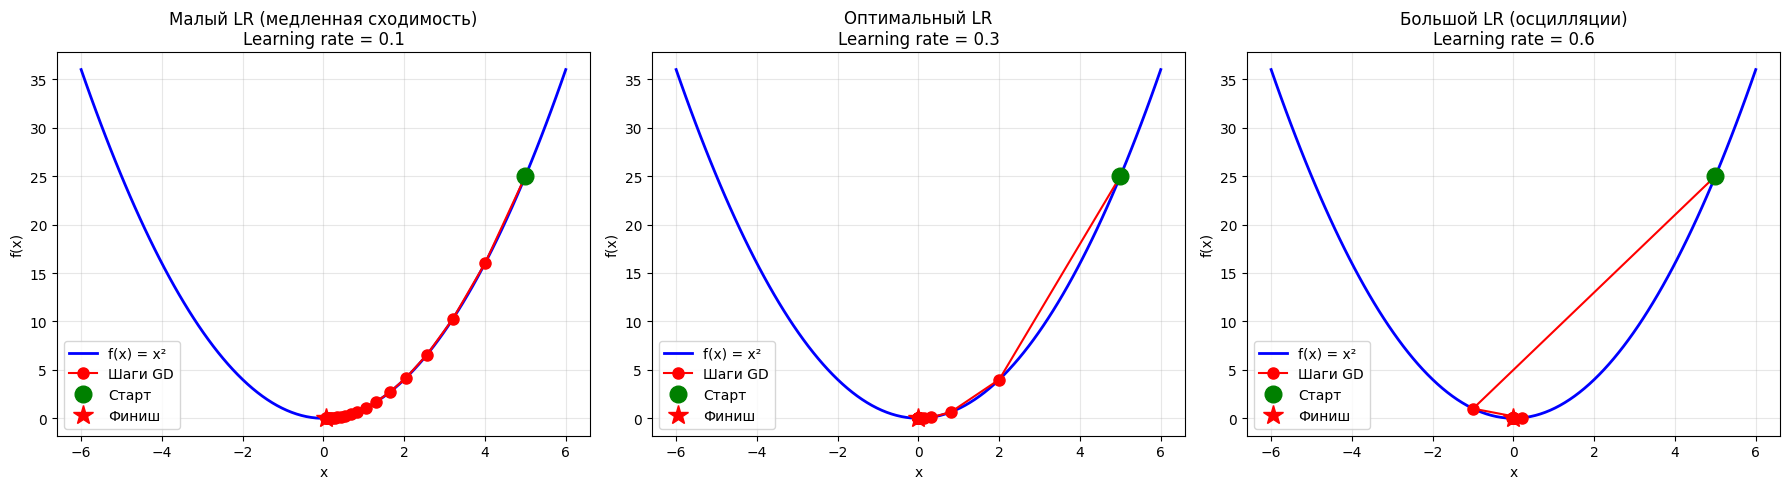

Малый LR: финальное значение x = 0.057646
Оптимальный LR: финальное значение x = 0.000000
Большой LR: финальное значение x = 0.000000


In [3]:
# Визуализация
x = np.linspace(-6, 6, 100)
y = quadratic_function(x)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, history, lr, title in zip(
    axes, 
    [history_small, history_good, history_large],
    [lr_small, lr_good, lr_large],
    ['Малый LR (медленная сходимость)', 'Оптимальный LR', 'Большой LR (осцилляции)']
):
    ax.plot(x, y, 'b-', linewidth=2, label='f(x) = x²')
    ax.plot(history, quadratic_function(history), 'ro-', markersize=8, label='Шаги GD')
    ax.plot(history[0], quadratic_function(history[0]), 'go', markersize=12, label='Старт')
    ax.plot(history[-1], quadratic_function(history[-1]), 'r*', markersize=15, label='Финиш')
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title(f'{title}\nLearning rate = {lr}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Малый LR: финальное значение x = {history_small[-1]:.6f}")
print(f"Оптимальный LR: финальное значение x = {history_good[-1]:.6f}")
print(f"Большой LR: финальное значение x = {history_large[-1]:.6f}")

## 3. Линейная регрессия с градиентным спуском

Применим градиентный спуск для решения биологической задачи: предсказание концентрации белка на основе экспрессии гена.

Модель: $y = wx + b$

Функция потерь (MSE): $L = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

Градиенты:
- $\frac{\partial L}{\partial w} = -\frac{2}{n}\sum_{i=1}^{n}x_i(y_i - \hat{y}_i)$
- $\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$

In [4]:
# Генерируем данные: экспрессия гена -> концентрация белка
n_samples = 100
true_w = 2.5
true_b = 10

# Экспрессия гена (условные единицы)
gene_expression = np.random.uniform(0, 10, n_samples)
# Концентрация белка с шумом (мкг/мл)
protein_concentration = true_w * gene_expression + true_b + np.random.normal(0, 2, n_samples)

# Нормализация данных для лучшей сходимости
X = (gene_expression - gene_expression.mean()) / gene_expression.std()
y = protein_concentration

print(f"Истинные параметры: w = {true_w}, b = {true_b}")
print(f"Размер выборки: {n_samples}")

Истинные параметры: w = 2.5, b = 10
Размер выборки: 100


In [5]:
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.loss_history = []
        self.w_history = []
        self.b_history = []
    
    def fit(self, X, y):
        n_samples = len(X)
        
        # Инициализация параметров
        self.w = 0
        self.b = 0
        
        # Градиентный спуск
        for i in range(self.n_iterations):
            # Предсказания
            y_pred = self.w * X + self.b
            
            # Вычисление функции потерь
            loss = np.mean((y - y_pred)**2)
            self.loss_history.append(loss)
            self.w_history.append(self.w)
            self.b_history.append(self.b)
            
            # Вычисление градиентов
            dw = -2 * np.mean(X * (y - y_pred))
            db = -2 * np.mean(y - y_pred)
            
            # Обновление параметров
            self.w -= self.lr * dw
            self.b -= self.lr * db
        
        return self
    
    def predict(self, X):
        return self.w * X + self.b

# Обучаем модель
model = LinearRegressionGD(learning_rate=0.1, n_iterations=100)
model.fit(X, y)

print(f"\nОценка параметров:")
print(f"w = {model.w:.2f}")
print(f"b = {model.b:.2f}")
print(f"Финальная ошибка (MSE): {model.loss_history[-1]:.2f}")


Оценка параметров:
w = 7.13
b = 21.75
Финальная ошибка (MSE): 3.23


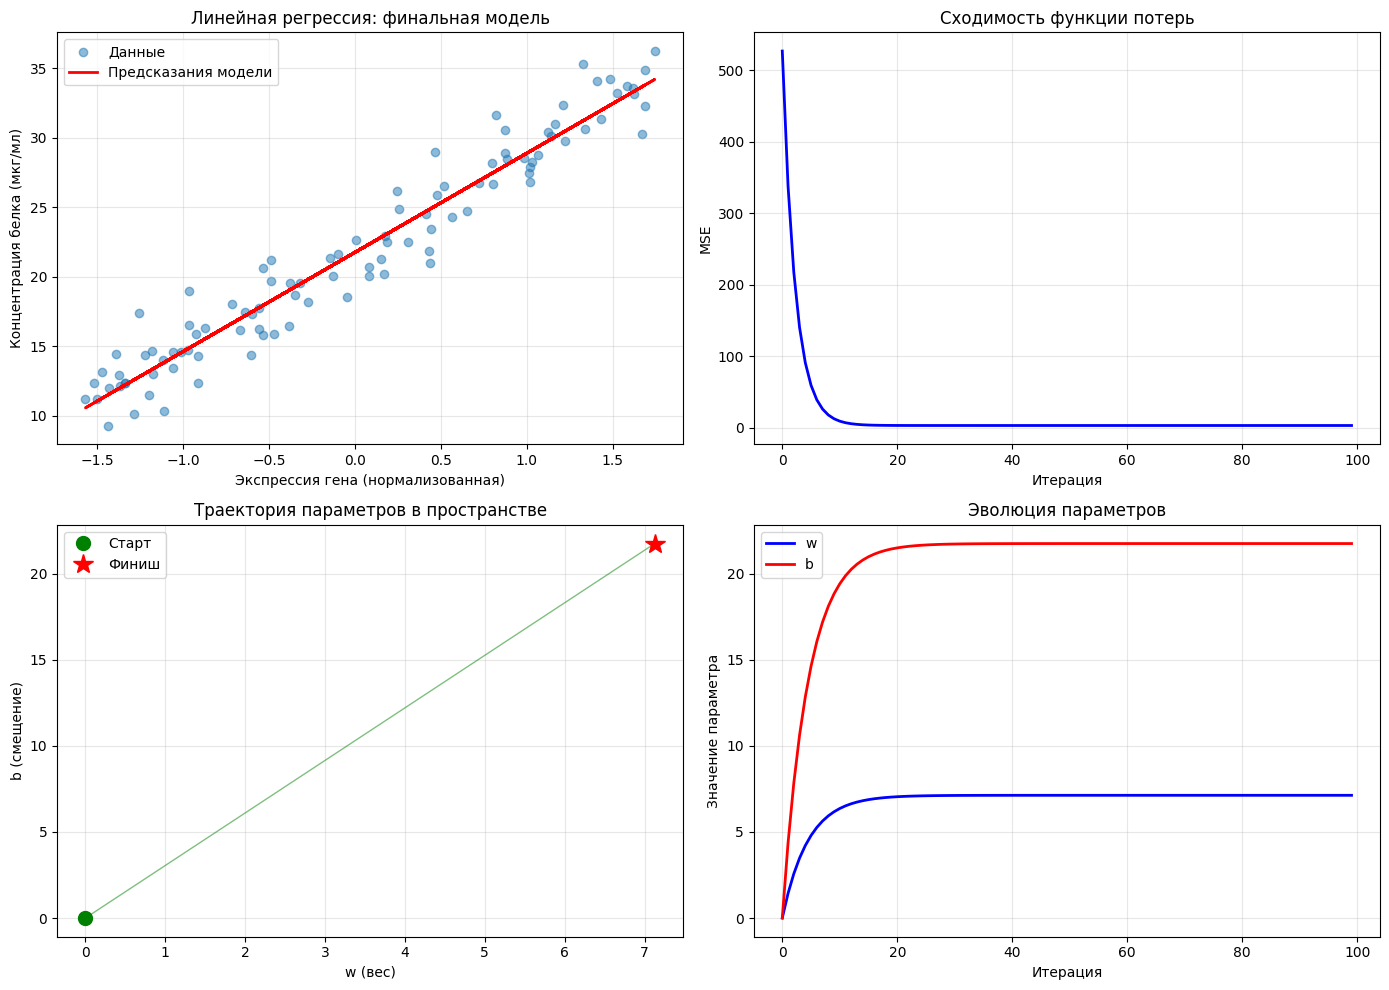

In [6]:
# Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Данные и финальная модель
axes[0, 0].scatter(X, y, alpha=0.5, label='Данные')
axes[0, 0].plot(X, model.predict(X), 'r-', linewidth=2, label='Предсказания модели')
axes[0, 0].set_xlabel('Экспрессия гена (нормализованная)')
axes[0, 0].set_ylabel('Концентрация белка (мкг/мл)')
axes[0, 0].set_title('Линейная регрессия: финальная модель')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. История функции потерь
axes[0, 1].plot(model.loss_history, 'b-', linewidth=2)
axes[0, 1].set_xlabel('Итерация')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('Сходимость функции потерь')
axes[0, 1].grid(True, alpha=0.3)

# 3. Траектория параметров
axes[1, 0].plot(model.w_history, model.b_history, 'g-', alpha=0.5, linewidth=1)
axes[1, 0].plot(model.w_history[0], model.b_history[0], 'go', markersize=10, label='Старт')
axes[1, 0].plot(model.w_history[-1], model.b_history[-1], 'r*', markersize=15, label='Финиш')
axes[1, 0].set_xlabel('w (вес)')
axes[1, 0].set_ylabel('b (смещение)')
axes[1, 0].set_title('Траектория параметров в пространстве')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Изменение параметров во времени
axes[1, 1].plot(model.w_history, 'b-', label='w', linewidth=2)
axes[1, 1].plot(model.b_history, 'r-', label='b', linewidth=2)
axes[1, 1].set_xlabel('Итерация')
axes[1, 1].set_ylabel('Значение параметра')
axes[1, 1].set_title('Эволюция параметров')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Варианты градиентного спуска

### 4.1 Batch Gradient Descent (BGD)
Использует все данные для вычисления градиента

### 4.2 Stochastic Gradient Descent (SGD)
Использует один случайный пример

### 4.3 Mini-batch Gradient Descent
Использует небольшую выборку данных

In [7]:
# Генерируем больше данных для демонстрации
n_samples_large = 1000
X_large = np.random.randn(n_samples_large)
y_large = 3 * X_large + 7 + np.random.randn(n_samples_large) * 0.5

def compute_gradient(X, y, w, b):
    """Вычисление градиента"""
    n = len(X)
    y_pred = w * X + b
    dw = -2 * np.mean(X * (y - y_pred))
    db = -2 * np.mean(y - y_pred)
    return dw, db

def compute_loss(X, y, w, b):
    """Вычисление MSE"""
    y_pred = w * X + b
    return np.mean((y - y_pred)**2)

# Batch GD
def batch_gd(X, y, lr=0.01, n_epochs=50):
    w, b = 0, 0
    loss_history = []
    
    for epoch in range(n_epochs):
        dw, db = compute_gradient(X, y, w, b)
        w -= lr * dw
        b -= lr * db
        loss_history.append(compute_loss(X, y, w, b))
    
    return w, b, loss_history

# Stochastic GD
def sgd(X, y, lr=0.01, n_epochs=50):
    w, b = 0, 0
    loss_history = []
    n_samples = len(X)
    
    for epoch in range(n_epochs):
        # Перемешиваем данные
        indices = np.random.permutation(n_samples)
        
        for i in indices:
            xi, yi = X[i], y[i]
            dw, db = compute_gradient(np.array([xi]), np.array([yi]), w, b)
            w -= lr * dw
            b -= lr * db
        
        loss_history.append(compute_loss(X, y, w, b))
    
    return w, b, loss_history

# Mini-batch GD
def minibatch_gd(X, y, lr=0.01, n_epochs=50, batch_size=32):
    w, b = 0, 0
    loss_history = []
    n_samples = len(X)
    
    for epoch in range(n_epochs):
        indices = np.random.permutation(n_samples)
        
        for start_idx in range(0, n_samples, batch_size):
            batch_indices = indices[start_idx:start_idx + batch_size]
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            
            dw, db = compute_gradient(X_batch, y_batch, w, b)
            w -= lr * dw
            b -= lr * db
        
        loss_history.append(compute_loss(X, y, w, b))
    
    return w, b, loss_history

In [8]:
# Сравниваем методы
n_epochs = 50

w_batch, b_batch, loss_batch = batch_gd(X_large, y_large, lr=0.1, n_epochs=n_epochs)
w_sgd, b_sgd, loss_sgd = sgd(X_large, y_large, lr=0.01, n_epochs=n_epochs)
w_mini, b_mini, loss_mini = minibatch_gd(X_large, y_large, lr=0.05, n_epochs=n_epochs, batch_size=32)

print("Результаты:")
print(f"Batch GD:      w={w_batch:.3f}, b={b_batch:.3f}, final_loss={loss_batch[-1]:.4f}")
print(f"SGD:           w={w_sgd:.3f}, b={b_sgd:.3f}, final_loss={loss_sgd[-1]:.4f}")
print(f"Mini-batch GD: w={w_mini:.3f}, b={b_mini:.3f}, final_loss={loss_mini[-1]:.4f}")
print(f"\nИстинные значения: w=3.0, b=7.0")

Результаты:
Batch GD:      w=2.979, b=7.015, final_loss=0.2410
SGD:           w=3.083, b=7.018, final_loss=0.2520
Mini-batch GD: w=2.978, b=7.000, final_loss=0.2412

Истинные значения: w=3.0, b=7.0


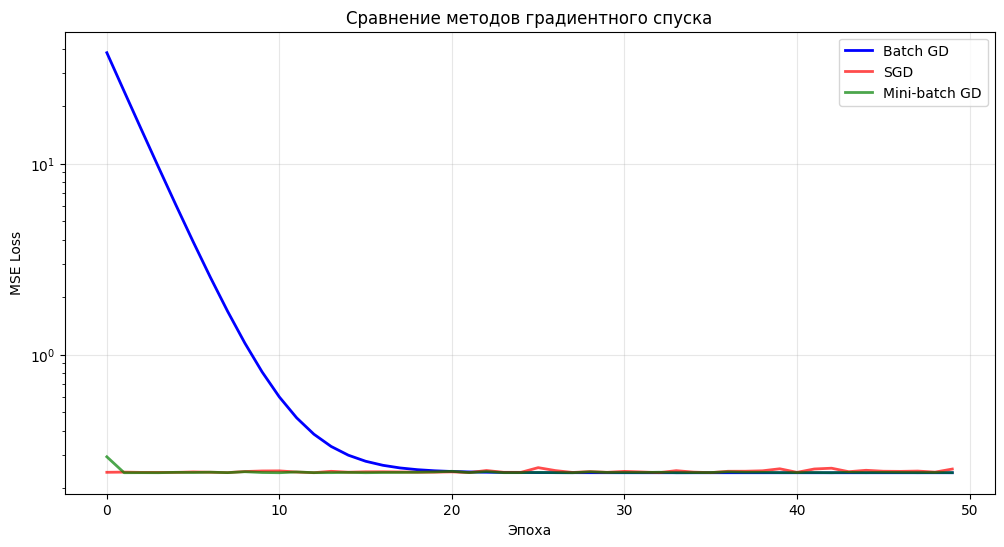

In [9]:
# Визуализация сравнения
plt.figure(figsize=(12, 6))
plt.plot(loss_batch, 'b-', linewidth=2, label='Batch GD')
plt.plot(loss_sgd, 'r-', linewidth=2, alpha=0.7, label='SGD')
plt.plot(loss_mini, 'g-', linewidth=2, alpha=0.7, label='Mini-batch GD')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.title('Сравнение методов градиентного спуска')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

## 5. Продвинутые методы оптимизации

### 5.1 Momentum
Учитывает предыдущие градиенты для ускорения сходимости

### 5.2 Adam (Adaptive Moment Estimation)
Комбинирует momentum и адаптивный learning rate

In [10]:
def sgd_momentum(X, y, lr=0.01, momentum=0.9, n_epochs=50):
    """SGD с momentum"""
    w, b = 0, 0
    vw, vb = 0, 0  # velocity для momentum
    loss_history = []
    
    for epoch in range(n_epochs):
        dw, db = compute_gradient(X, y, w, b)
        
        # Обновление velocity
        vw = momentum * vw + lr * dw
        vb = momentum * vb + lr * db
        
        # Обновление параметров
        w -= vw
        b -= vb
        
        loss_history.append(compute_loss(X, y, w, b))
    
    return w, b, loss_history

def adam(X, y, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, n_epochs=50):
    """Adam оптимизатор"""
    w, b = 0, 0
    mw, mb = 0, 0  # первый момент
    vw, vb = 0, 0  # второй момент
    loss_history = []
    
    for epoch in range(1, n_epochs + 1):
        dw, db = compute_gradient(X, y, w, b)
        
        # Обновление моментов
        mw = beta1 * mw + (1 - beta1) * dw
        mb = beta1 * mb + (1 - beta1) * db
        vw = beta2 * vw + (1 - beta2) * dw**2
        vb = beta2 * vb + (1 - beta2) * db**2
        
        # Bias correction
        mw_hat = mw / (1 - beta1**epoch)
        mb_hat = mb / (1 - beta1**epoch)
        vw_hat = vw / (1 - beta2**epoch)
        vb_hat = vb / (1 - beta2**epoch)
        
        # Обновление параметров
        w -= lr * mw_hat / (np.sqrt(vw_hat) + epsilon)
        b -= lr * mb_hat / (np.sqrt(vb_hat) + epsilon)
        
        loss_history.append(compute_loss(X, y, w, b))
    
    return w, b, loss_history

Сравнение методов оптимизации:
SGD:      w=2.979, b=7.015, final_loss=0.2410
Momentum: w=2.751, b=7.053, final_loss=0.2930
Adam:     w=3.119, b=6.603, final_loss=0.4237


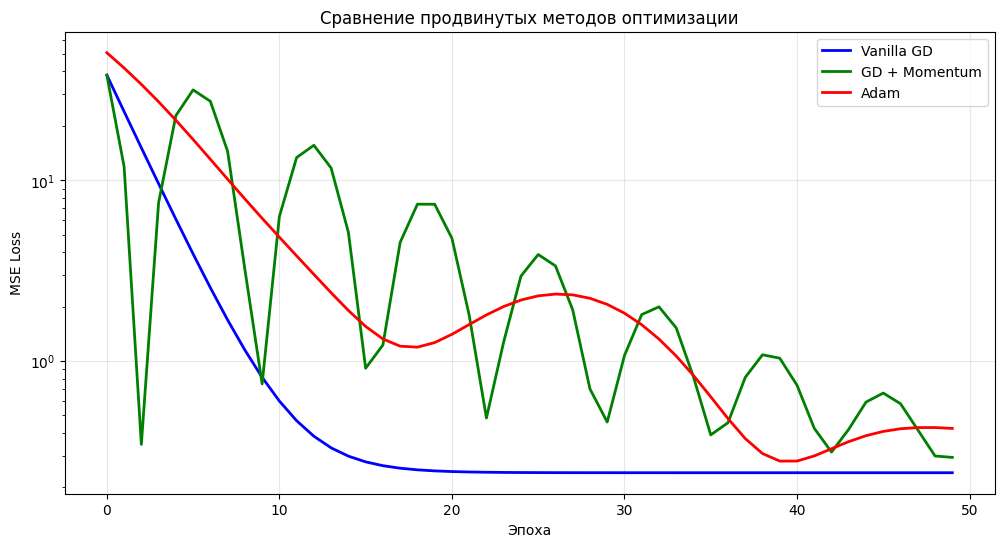

In [11]:
# Сравниваем продвинутые методы
w_mom, b_mom, loss_mom = sgd_momentum(X_large, y_large, lr=0.1, n_epochs=50)
w_adam, b_adam, loss_adam = adam(X_large, y_large, lr=0.5, n_epochs=50)
w_sgd_base, b_sgd_base, loss_sgd_base = batch_gd(X_large, y_large, lr=0.1, n_epochs=50)

print("Сравнение методов оптимизации:")
print(f"SGD:      w={w_sgd_base:.3f}, b={b_sgd_base:.3f}, final_loss={loss_sgd_base[-1]:.4f}")
print(f"Momentum: w={w_mom:.3f}, b={b_mom:.3f}, final_loss={loss_mom[-1]:.4f}")
print(f"Adam:     w={w_adam:.3f}, b={b_adam:.3f}, final_loss={loss_adam[-1]:.4f}")

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(loss_sgd_base, 'b-', linewidth=2, label='Vanilla GD')
plt.plot(loss_mom, 'g-', linewidth=2, label='GD + Momentum')
plt.plot(loss_adam, 'r-', linewidth=2, label='Adam')
plt.xlabel('Эпоха')
plt.ylabel('MSE Loss')
plt.title('Сравнение продвинутых методов оптимизации')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

## 6. Биологический пример: Классификация клеток (Логистическая регрессия)

In [12]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Генерируем данные: классификация клеток по двум биомаркерам
X_class, y_class = make_classification(
    n_samples=300,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

Размер обучающей выборки: 210
Размер тестовой выборки: 90


In [13]:
def sigmoid(z):
    """Сигмоидная функция"""
    return 1 / (1 + np.exp(-z))

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.w = None
        self.b = None
        self.loss_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Инициализация
        self.w = np.zeros(n_features)
        self.b = 0
        
        # Градиентный спуск
        for i in range(self.n_iterations):
            # Линейная модель
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)
            
            # Binary cross-entropy loss
            loss = -np.mean(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))
            self.loss_history.append(loss)
            
            # Градиенты
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)
            
            # Обновление параметров
            self.w -= self.lr * dw
            self.b -= self.lr * db
        
        return self
    
    def predict_proba(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Обучаем модель
log_model = LogisticRegressionGD(learning_rate=0.1, n_iterations=1000)
log_model.fit(X_train, y_train)

# Оценка качества
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

train_accuracy = np.mean(train_pred == y_train)
test_accuracy = np.mean(test_pred == y_test)

print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Точность на обучающей выборке: 0.914
Точность на тестовой выборке: 0.944


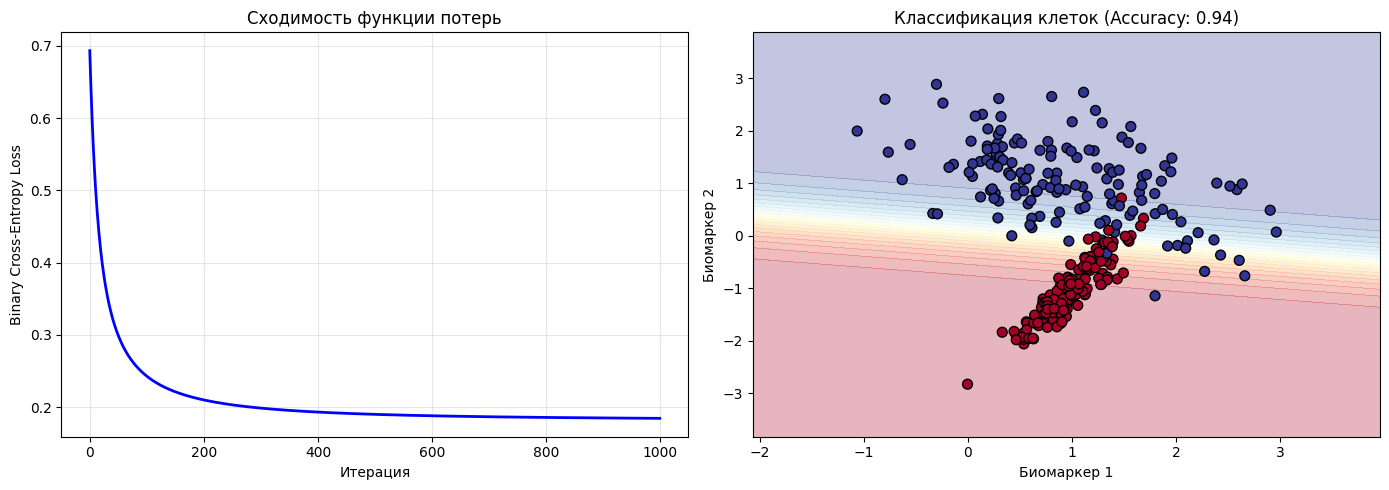

In [14]:
# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График сходимости
axes[0].plot(log_model.loss_history, 'b-', linewidth=2)
axes[0].set_xlabel('Итерация')
axes[0].set_ylabel('Binary Cross-Entropy Loss')
axes[0].set_title('Сходимость функции потерь')
axes[0].grid(True, alpha=0.3)

# Граница решения
h = 0.02
x_min, x_max = X_class[:, 0].min() - 1, X_class[:, 0].max() + 1
y_min, y_max = X_class[:, 1].min() - 1, X_class[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = log_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, levels=20, cmap='RdYlBu')
axes[1].scatter(X_class[:, 0], X_class[:, 1], c=y_class, edgecolors='k', cmap='RdYlBu', s=50)
axes[1].set_xlabel('Биомаркер 1')
axes[1].set_ylabel('Биомаркер 2')
axes[1].set_title(f'Классификация клеток (Accuracy: {test_accuracy:.2f})')

plt.tight_layout()
plt.show()

## 7. Задания для самостоятельной работы

1. Реализуйте регуляризацию (L1 и L2) для линейной регрессии с градиентным спуском
2. Сравните скорость сходимости разных оптимизаторов на более сложной функции
3. Реализуйте learning rate scheduling (постепенное уменьшение learning rate)
4. Примените градиентный спуск к задаче многоклассовой классификации